In [6]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt


BASE_DIR = pathlib.Path.cwd().parents[0]
DATA_FINAL_DIR = BASE_DIR / 'data' / 'data_final'

df = pd.read_csv(str(DATA_FINAL_DIR / 'final_dataset_with_ratings.csv'))

C:\Users\aless\AppData\Local\Temp\ipykernel_29284\1258850.py:9: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(str(DATA_FINAL_DIR / 'final_dataset_with_ratings.csv'))


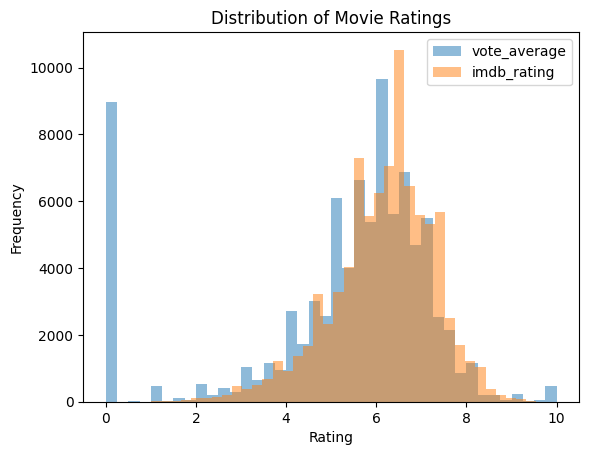

In [7]:
plt.hist(df['vote_average'].dropna(), bins=40, alpha=0.5, label='vote_average')
plt.hist(df['imdb_rating'].dropna(), bins=40, alpha=0.5, label='imdb_rating')
plt.legend()
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

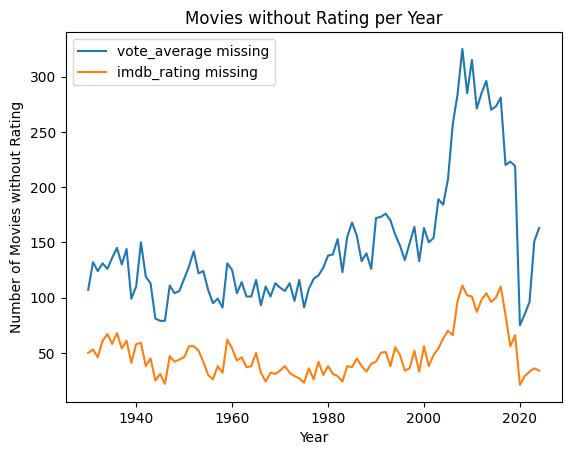

In [12]:
mask_no_vote_average = (
    df['vote_average']
    .fillna(0)
    .eq(0)
)

mask_no_averageRating = (
    df['imdb_rating']
    .fillna(0)
    .eq(0)
)


no_vote_1_per_year = (
    df.groupby('year')
          .agg(num_movie_without_vote1=('vote_average', lambda x: mask_no_vote_average.loc[x.index].sum()))
          .reset_index()
)

no_vote_2_per_year = (
    df.groupby('year')
          .agg(num_movie_without_vote2=('imdb_rating', lambda x: mask_no_averageRating.loc[x.index].sum()))
          .reset_index()
)


# plot number of movies without ratings per year
plt.plot(no_vote_1_per_year['year'], no_vote_1_per_year['num_movie_without_vote1'], label='vote_average missing')
plt.plot(no_vote_2_per_year['year'], no_vote_2_per_year['num_movie_without_vote2'], label='imdb_rating missing')
plt.xlabel('Year')
plt.ylabel('Number of Movies without Rating')
plt.title('Movies without Rating per Year')
plt.legend()
plt.show()

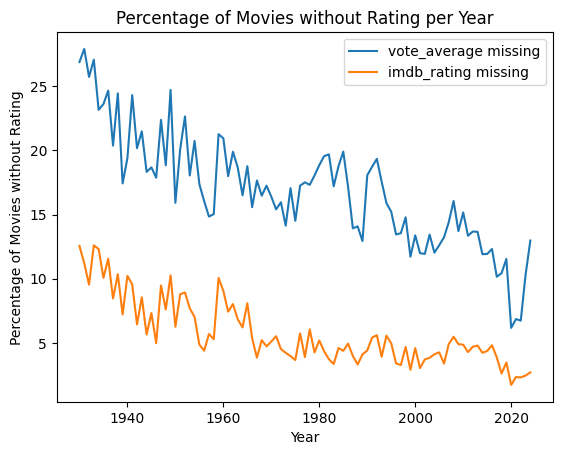

In [13]:
percentage_novote1 = (
    df.groupby('year')
          .agg(
              totale_film=('vote_average', 'size'),
              film_senza_voto=('vote_average', lambda x: mask_no_vote_average.loc[x.index].sum())
          )
          .reset_index()
)

percentage_novote1['percentage_movies_without_rankings'] = (
    percentage_novote1['film_senza_voto']
    / percentage_novote1['totale_film'] * 100
)

percentage_novote2 = (
    df.groupby('year')
          .agg(
              tot_movies=('imdb_rating', 'size'),
              movie_without_vote=('imdb_rating', lambda x: mask_no_averageRating.loc[x.index].sum())
          )
          .reset_index()
)

percentage_novote2['percentage_movies_without_rankings'] = (
    percentage_novote2['movie_without_vote']
    / percentage_novote2['tot_movies'] * 100
)


# plot percentage of movies without ratings per year
plt.plot(percentage_novote1['year'], percentage_novote1['percentage_movies_without_rankings'], label='vote_average missing')
plt.plot(percentage_novote2['year'], percentage_novote2['percentage_movies_without_rankings'], label='imdb_rating missing')
plt.xlabel('Year')
plt.ylabel('Percentage of Movies without Rating')
plt.title('Percentage of Movies without Rating per Year')
plt.legend()
plt.show()

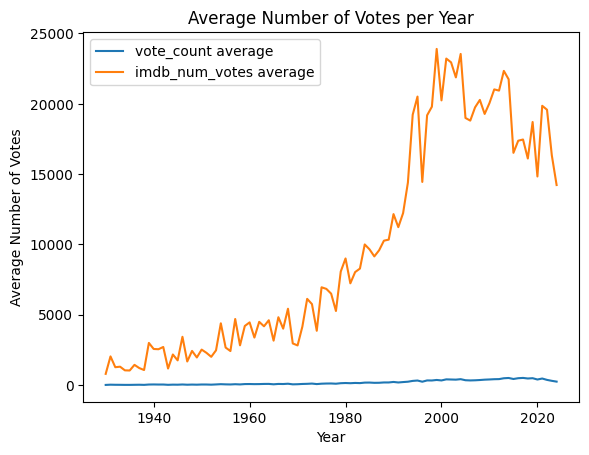

In [11]:
# plot number of votes per year
plt.plot(df.groupby('year')['vote_count'].mean().index,
         df.groupby('year')['vote_count'].mean(), label='vote_count average')
plt.plot(df.groupby('year')['imdb_num_votes'].mean().index,
         df.groupby('year')['imdb_num_votes'].mean(), label='imdb_num_votes average')
plt.xlabel('Year')
plt.ylabel('Average Number of Votes')
plt.title('Average Number of Votes per Year')
plt.legend()
plt.show()